***

# A Study on the Biodiversity of the National Parks

![park](https://api.time.com/wp-content/uploads/2016/08/gettyimages-535829001.jpg?quality=85&w=800)

***

## Introduction

This study aims at analyzing wldlife data from the national parks, investigating trends and drawing conclusions from the data provided. The main objective is to analyze trends focusing on the conservation statuses of the species.
The study tries to answer the following initial questions:
* Conservation Status: How well preserved are the species in National Parks? Are there any endangered species? Which kind of categories are the most vulnerable?
* How strong is the correlation between the number of observations and the conservation status of the species? How well can we predict the conservation status by the number of observations made, taking into account the catrgory each species fall into?

During the development of the study, other questions, not previously foreseen, may arise.

***

## Package Import, Data Import, Cleaning and Table Joining

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
obs_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

In [3]:
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [4]:
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [7]:
species_df = species_df.fillna(value = {'conservation_status': 'No Concern'})
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern
1,Mammal,Bos bison,"American Bison, Bison",No Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Concern


In [8]:
print(species_df.groupby('conservation_status').scientific_name.count())

conservation_status
Endangered              16
In Recovery              4
No Concern            5633
Species of Concern     161
Threatened              10
Name: scientific_name, dtype: int64


In [9]:
# Ordinal Categorical Data (Conservation Status) - Ordering Statuses
order = ['No Concern', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']

In [10]:
species_df['concern'] = species_df['conservation_status'].apply(lambda x: 0 if x == 'No Concern' else 1)

In [11]:
print(species_df.groupby('concern').scientific_name.count())
species_df.head()

concern
0    5633
1     191
Name: scientific_name, dtype: int64


,category,scientific_name,common_names,conservation_status,concern
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern,0
1,Mammal,Bos bison,"American Bison, Bison",No Concern,0
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Concern,0
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Concern,0
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Concern,0


In [12]:
# Merging both tables in one, since they have scientific_name as a common column
compound_df = pd.merge(obs_df, species_df)

In [13]:
compound_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,concern
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern,0
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern,0
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern,0
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern,0
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Concern,0


In [14]:
compound_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  25632 non-null  object
 6   concern              25632 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.6+ MB


In [15]:
# Ordering Categorical Data (Conservation Status)
compound_df['conservation_status'] = pd.Categorical(compound_df.conservation_status, order, ordered = True)

In [16]:
# Creating split columns for scientific name (genus and species)
compound_df['split_name'] = compound_df['scientific_name'].str.split(' ')
compound_df['genus'] = compound_df.split_name.str.get(0)
compound_df['species'] = compound_df.split_name.str.get(1)
compound_df.drop(columns = ['split_name'], inplace = True)
compound_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,concern,genus,species
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern,0,Vicia,benghalensis
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern,0,Vicia,benghalensis
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern,0,Vicia,benghalensis
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern,0,Vicia,benghalensis
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Concern,0,Neovison,vison


In [17]:
compound_df = compound_df[['park_name','category','scientific_name','genus','species', 'common_names', 'observations','conservation_status','concern']]
compound_df.head()

,park_name,category,scientific_name,genus,species,common_names,observations,conservation_status,concern
0,Great Smoky Mountains National Park,Vascular Plant,Vicia benghalensis,Vicia,benghalensis,"Purple Vetch, Reddish Tufted Vetch",68,No Concern,0
1,Yosemite National Park,Vascular Plant,Vicia benghalensis,Vicia,benghalensis,"Purple Vetch, Reddish Tufted Vetch",148,No Concern,0
2,Yellowstone National Park,Vascular Plant,Vicia benghalensis,Vicia,benghalensis,"Purple Vetch, Reddish Tufted Vetch",247,No Concern,0
3,Bryce National Park,Vascular Plant,Vicia benghalensis,Vicia,benghalensis,"Purple Vetch, Reddish Tufted Vetch",104,No Concern,0
4,Great Smoky Mountains National Park,Mammal,Neovison vison,Neovison,vison,American Mink,77,No Concern,0


***

## Summary Statistics

### <strong> Conservation Status

<em><strong> 1) Conservation Status Proportions

The objective of this session is to analyze and plot the conservation status of the different species present in the data provided. 

First, data was split between species which do not represent any concern regarding its conservation status, and species that has some degree of threat to its conservation (aggregating all of conservation statuses which are different from 'No Concern'.

Second, the share of species which do have a status different from 'No Concern' was isolated and a proportion breakdown was carried out to show how are the concern status distributed between concerned species. 

  conservation_status  proportion
0          Endangered    0.002747
1         In Recovery    0.000687
2          No Concern    0.967205
3  Species of Concern    0.027644
4          Threatened    0.001717


C:\Users\rafab\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(-1.1048422137556666,
 1.1002305816074127,
 -1.1062724583545613,
 1.106212620881293)

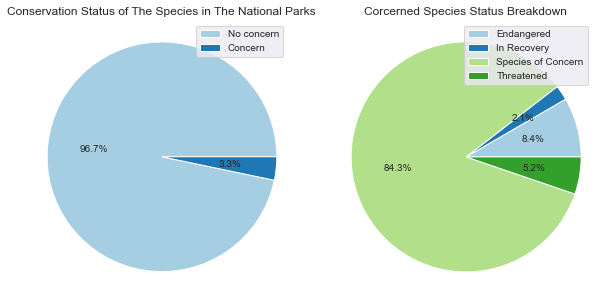

In [18]:
# Conservation Status - Proportions
status_prop = species_df.groupby('conservation_status').scientific_name.count().reset_index() 
pop = species_df.scientific_name.count()
status_prop['scientific_name'] = status_prop['scientific_name'] / pop
status_prop.rename(columns = {'scientific_name': 'proportion'}, inplace = True)
print(status_prop)
no_concern = status_prop.at[2,'proportion']
concern = 1 - no_concern

# Style Set
palette_1 = sns.color_palette('Paired', 10)
sns.set_palette(palette_1)
sns.set_style('darkgrid')

# Pie Plot
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.pie([no_concern, concern], autopct = '%0.1f%%')
plt.legend(['No concern', 'Concern'])
plt.title('Conservation Status of The Species in The National Parks')
plt.axis('equal')

# Status Breakdown
status_break = status_prop[status_prop.conservation_status != 'No Concern']
status_break.proportion = status_break.proportion / status_break.proportion.sum()
plt.subplot(1,2,2)
plt.pie(status_break.proportion, autopct = '%0.1f%%')
plt.legend(status_break.conservation_status)
plt.title('Corcerned Species Status Breakdown')
plt.axis('equal')

<em> Conclusions </em>
* The share of species which represent a conservation status concern is small compared to the number of species in the study;
* Most of the species that represent a concern in terms of conservation fall into the first level of threat, species of Concern (84.3%);
* 0.27% of the species (3.3% x 8.4%) have 'Endangered' as their status

<em><strong> 2) Category Breakdown - Concerned Species

In this section, the objective is to analyze, among the different categories of species, the ones which are more threatened  in their conservation.

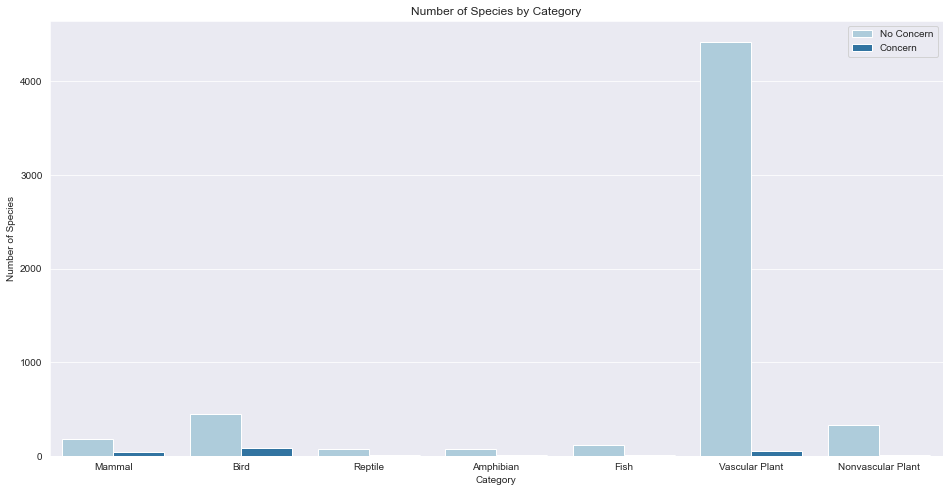

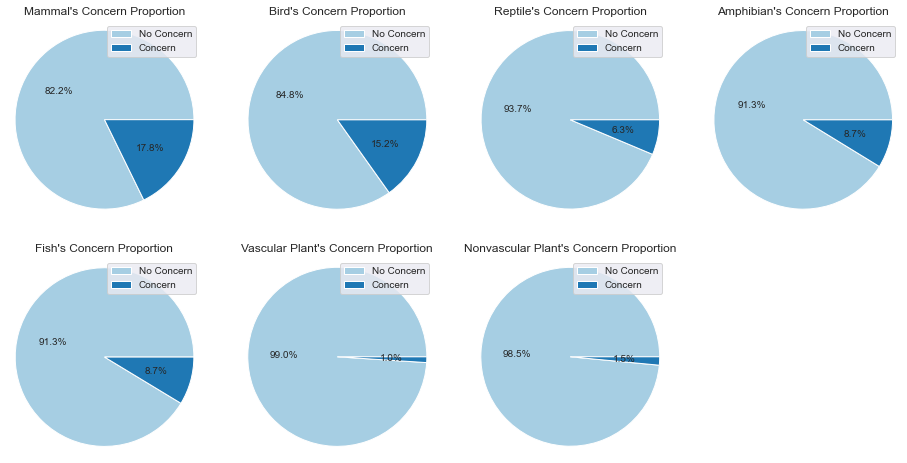

In [19]:
# Ploting Number of Species in each Category (note the log scale in the y-axis!)
categories = species_df.category.unique()
plt.figure(figsize = (16,8))
ax = sns.countplot(data = species_df, x = 'category', hue = 'concern')
ax.set_title('Number of Species by Category')
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_xlabel('Category')
ax.set_ylabel('Number of Species')
plt.legend(['No Concern','Concern'], loc = 1)

plt.figure(figsize = (16,8))
for i in range(len(categories)):
    plt.subplot(2,4,i + 1)
    concern_prop = len(species_df[(species_df.category == categories[i]) & (species_df.concern == 1)]) / len(species_df[species_df.category == categories[i]])
    no_concern_prop = 1 - concern_prop
    plt.pie([no_concern_prop, concern_prop], autopct = '%0.1f%%')
    plt.legend(['No Concern', 'Concern'])
    plt.title("{category}'s Concern Proportion".format(category = categories[i]))
    plt.axis('equal')

<em> Conclusions </em>

While looking at the data, the conservation statuses of the different categories can be  analyzed by two different views: absolute and relative. The absolute view has more to do with the first (bar) plot above, while the reltative view, with th second (pie) plot.

Taking the absolute view first, we can conclude that:

* The number of different kinds of species are not uniform across categories. Some categories tend to concentrate the number of species, such as plans (vascular and non-vascular) and birds.
* In absolute terms, the categories that present the highest concern are birds and vascular plants, followed by mammals, fish and amphibians.

Relatively speaking, the conclusions are somehow different from the previous ones:

* Birds and Mammals stand out as the categories with the largest relative population in concern conditions;
* Amphibians, Fish and Reptiles present intermediate concern proportions;
* Plants have only a small percentage (1-2%) of its populations in concern conditions

#### <em> 3) Severity of Conservation Status - Breakdown
    
Now we take a look at the severity of the conervation status among the different categories. In order to do so, we have to analyze how the species in each category distribute themselves in each kind of conservation status.

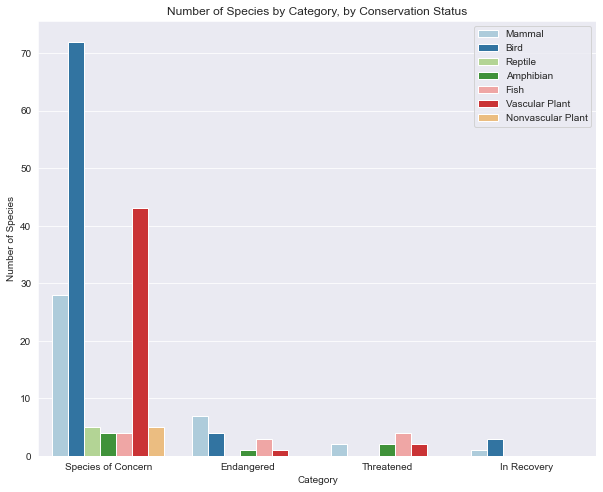

In [20]:
# Ploting Concerned Species Category Breakdown
concern_df = species_df[species_df.conservation_status != 'No Concern']
concern_df = concern_df[['category', 'scientific_name', 'conservation_status']]

plt.figure(figsize = (10,8))
ax = sns.countplot(data = concern_df, x = 'conservation_status', hue = 'category')
ax.set_title('Number of Species by Category, by Conservation Status')
ax.set_xticks(range(len(concern_df.conservation_status.unique())))
ax.set_xticklabels(concern_df.conservation_status.unique(),)
ax.set_xlabel('Category')
ax.set_ylabel('Number of Species')
plt.legend(loc = 1)

<em> Conclusions </em>
* From the plot above, which shows the distribution of species in different categories among different levels of threat, we can see that some categories have their concerned population concentrated in the first level of concern ('Species of concern'), whereas others have a higher ratio of their concerned population in the more vulnerable concern categories.

Now, in order to analyze deeper into the data, a new variable called 'concern index' was created. This index was derived first by transforming the categorical variable <em>conservation_status</em> to an ordinal variable, assuming an implicit order in the statuses, from the smallest to the largest threat (ranging from 1 to 4). Then, the mean value of the categorical codes was calculated for each category, without considering the species that are of 'No Concern'. I expect that this will be a fair measure of the most vulnerable categories, which urge attention by the enviroment specialists.

The mean concern index is: 1.3769633507853403


Text(0, 0.5, 'Concern Index')

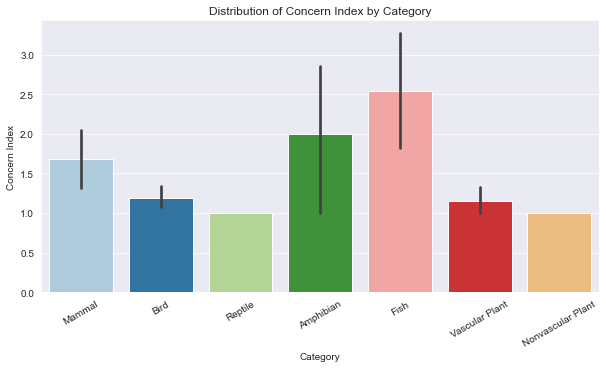

In [21]:
# Ploting Categories agains Concern Index
concern_df['conservation_status'] = pd.Categorical(concern_df.conservation_status, order, ordered = True)
mean_concern_index = np.mean(concern_df.conservation_status.cat.codes)
print('The mean concern index is: {concern}'.format(concern = mean_concern_index))
concern_df['concern_index'] = concern_df.conservation_status.cat.codes

plt.figure(figsize = (10,5))
ax = sns.barplot(data = concern_df, x = 'category', y = 'concern_index', estimator = np.mean)
ax.set_title('Distribution of Concern Index by Category')
ax.set_xticks(range(len(concern_df.category.unique())))
ax.set_xticklabels(concern_df.category.unique(), rotation = 30)
ax.set_xlabel('Category')
ax.set_ylabel('Concern Index')

<em> Conclusions </em>
* Comparing the individual concern indexes among different categories with the mean concern index, the above plot suggests that some categories are more severely threatened in their conservation than others.
* Fish, Amphibian and Mammal categories have higher average concern index compared to the whole population of species in concern

***

### Correlation between Number of Observations and Conservation Status

Now the focus of the analysis will be the correlation between each species number of observations and the corresponding concern index (derived from conservation status as explained in the previous section). The analysis will take into consideration the overall numbers (averaging the number of observations between four parks) as well as each park individually.

In [22]:
# Preparing tables for analysis
compound_df['concern_index'] = compound_df.conservation_status.cat.codes
compound_df.head()

,park_name,category,scientific_name,genus,species,common_names,observations,conservation_status,concern,concern_index
0,Great Smoky Mountains National Park,Vascular Plant,Vicia benghalensis,Vicia,benghalensis,"Purple Vetch, Reddish Tufted Vetch",68,No Concern,0,0
1,Yosemite National Park,Vascular Plant,Vicia benghalensis,Vicia,benghalensis,"Purple Vetch, Reddish Tufted Vetch",148,No Concern,0,0
2,Yellowstone National Park,Vascular Plant,Vicia benghalensis,Vicia,benghalensis,"Purple Vetch, Reddish Tufted Vetch",247,No Concern,0,0
3,Bryce National Park,Vascular Plant,Vicia benghalensis,Vicia,benghalensis,"Purple Vetch, Reddish Tufted Vetch",104,No Concern,0,0
4,Great Smoky Mountains National Park,Mammal,Neovison vison,Neovison,vison,American Mink,77,No Concern,0,0


In [23]:
obs_df = compound_df.groupby('scientific_name').observations.sum().reset_index()
obs_df.info()
obs_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  5541 non-null   object
 1   observations     5541 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.7+ KB


,scientific_name,observations
0,Abies bifolia,532
1,Abies concolor,630
2,Abies fraseri,518
3,Abietinella abietina,592
4,Abronia ammophila,523


In [24]:
index_df = compound_df.groupby('scientific_name').concern_index.mean().reset_index()
index_df.info()
index_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scientific_name  5541 non-null   object 
 1   concern_index    5541 non-null   float64
dtypes: float64(1), object(1)
memory usage: 86.7+ KB


,scientific_name,concern_index
0,Abies bifolia,0.0
1,Abies concolor,0.0
2,Abies fraseri,1.0
3,Abietinella abietina,0.0
4,Abronia ammophila,1.0


In [25]:
obs_index_df = pd.merge(obs_df, index_df)
obs_index_df.head()

,scientific_name,observations,concern_index
0,Abies bifolia,532,0.0
1,Abies concolor,630,0.0
2,Abies fraseri,518,1.0
3,Abietinella abietina,592,0.0
4,Abronia ammophila,523,1.0


In [26]:
obs_index_cat_df = pd.merge(obs_index_df, species_df)
obs_index_cat_df = obs_index_cat_df[['scientific_name', 'category','observations', 'concern_index']]
obs_index_cat_df.head()

,scientific_name,category,observations,concern_index
0,Abies bifolia,Vascular Plant,532,0.0
1,Abies concolor,Vascular Plant,630,0.0
2,Abies fraseri,Vascular Plant,518,1.0
3,Abietinella abietina,Nonvascular Plant,592,0.0
4,Abronia ammophila,Vascular Plant,523,1.0


Pearson correlation coefficient: -0.20713310205111143


<Figure size 720x360 with 0 Axes>

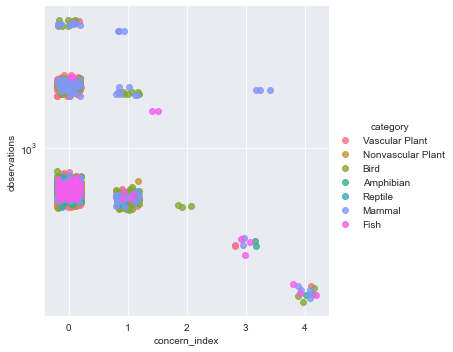

In [27]:
# Plotting concern indexes vs observations

# Style Set
palette_2 = sns.color_palette('PRGn')
sns.set_palette(palette_2)

plt.figure(figsize = (10,5))
ax = sns.lmplot(data = obs_index_cat_df, x = 'concern_index', y = 'observations', x_jitter = 0.2, y_jitter = 0.2, fit_reg = False, hue = 'category')
plt.yscale('log')

corr, p = pearsonr(obs_index_df.concern_index, np.log(obs_index_df.observations))
print('Pearson correlation coefficient: {correlation}'.format(correlation = corr))

<em> Conclusions </em>
* When we plot number of observations made of one species against the concern index, we can see the expected trend that the less observations are made, the higher the concern index of the species. However, there are some outliers, which will be investigated further.
* The pearson coefficient was calculated and reflected the inverse proportionality between the variables as expected, but the modulus of the pearson coefficient have shown a relatively weak correlation as data is spread in clusters, even when logarithmic scale is chosen for the y-axis.

In [28]:
# Listing the most vulnerable species
obs_index_df[obs_index_df.concern_index >= 3]

,scientific_name,observations,concern_index
239,Anaxyrus canorus,274,3.000000
804,Canis lupus,2145,3.333333
805,Canis rufus,137,4.000000
1206,Chasmistes liorus,146,4.000000
1961,Erimonax monachus,242,3.000000
2030,Etheostoma percnurum,166,4.000000
2273,Geum radiatum,162,4.000000
2292,Glaucomys sabrinus coloratus,153,4.000000
2323,Grus americana,131,4.000000
2328,Gymnogyps californianus,156,4.000000


In [29]:
species_df[['scientific_name', 'conservation_status']][species_df.scientific_name == 'Canis lupus']

,scientific_name,conservation_status
8,Canis lupus,Endangered
3020,Canis lupus,In Recovery
4448,Canis lupus,Endangered


In [30]:
# There is a kind of fish which also has two different concern statuses
obs_index_df[obs_index_df.concern_index == 1.5]

,scientific_name,observations,concern_index
3430,Oncorhynchus mykiss,1626,1.5


In [31]:
species_df[['scientific_name', 'conservation_status','category']][species_df.scientific_name == 'Oncorhynchus mykiss']

,scientific_name,conservation_status,category
560,Oncorhynchus mykiss,No Concern,Fish
3283,Oncorhynchus mykiss,Threatened,Fish


<em> Conclusions </em>
* The vast majority of the species that hava high concern indexes have small observation numbers;
* Clearly, Canis Lupus ('Gray Wolf') is an outlier. More data and a better understanding of the peculiarities of this species are needed to better understand why it is considered an endangered species
* In species_df there are 3 different entries for Canis Lupus, with two different conservation statuses . That's why the average concern_index for this species is not an integer.
* Canis Lupus and Oncorhynchus mykiss are two species which have at least two different concern statuses, curiously. Maybe considering two different habitats / parks

### How the Category of th Species relates to the Number of Observations

Now the investigation aims at analyzing it there is a trend in the number of observations and the category the species represent.

In [32]:
# Ploting Aggregate Number of Observations for each Category
cat_obs_df = compound_df.groupby('category').observations.sum().reset_index()
cat_obs_df

,category,observations
0,Amphibian,45068
1,Bird,332371
2,Fish,72901
3,Mammal,163120
4,Nonvascular Plant,190653
5,Reptile,45822
6,Vascular Plant,2795312


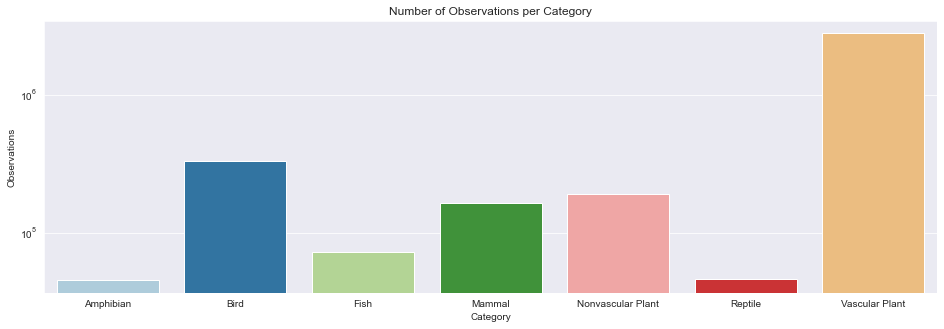

In [33]:
sns.set_palette(palette_1)
plt.figure(figsize = (16,5))
ax = sns.barplot(data = cat_obs_df, x = 'category', y = 'observations')
ax.set_xlabel('Category')
ax.set_ylabel('Observations')
ax.set_title('Number of Observations per Category')
plt.yscale('log')

In [34]:
# Correlation between number of observations and number of different species
cat_count_df = compound_df.groupby('category').scientific_name.nunique().reset_index()
print(cat_count_df)
cat_obs_df = pd.merge(cat_count_df, cat_obs_df)
cat_obs_df.rename(columns = {'scientific_name': 'number_of_species'}, inplace = True)
print()
print(cat_obs_df)

            category  scientific_name
0          Amphibian               79
1               Bird              488
2               Fish              125
3             Mammal              176
4  Nonvascular Plant              333
5            Reptile               78
6     Vascular Plant             4262

            category  number_of_species  observations
0          Amphibian                 79         45068
1               Bird                488        332371
2               Fish                125         72901
3             Mammal                176        163120
4  Nonvascular Plant                333        190653
5            Reptile                 78         45822
6     Vascular Plant               4262       2795312


            category  number_of_species  observations     avg_obs
0          Amphibian                 79         45068  570.481013
1               Bird                488        332371  681.088115
2               Fish                125         72901  583.208000
3             Mammal                176        163120  926.818182
4  Nonvascular Plant                333        190653  572.531532
5            Reptile                 78         45822  587.461538
6     Vascular Plant               4262       2795312  655.868606


Text(0.5, 1.0, 'Average Number of Observations per Species, per Category')

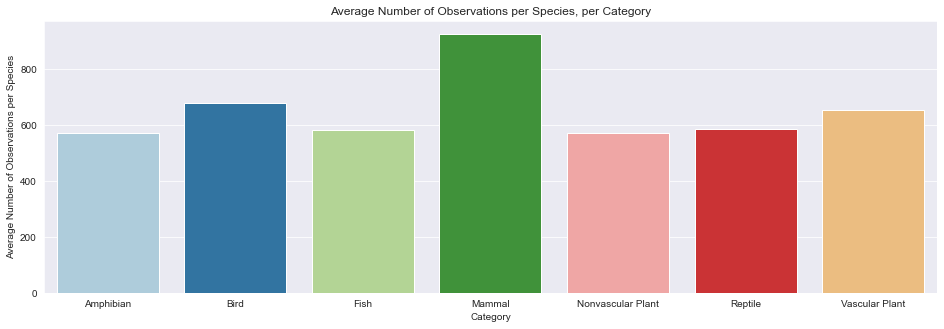

In [35]:
# Ploting Average number of Observation per Species in each Category
cat_obs_df['avg_obs'] = cat_obs_df['observations'] / cat_obs_df['number_of_species']
print(cat_obs_df)
plt.figure(figsize = (16,5))
ax = sns.barplot(data = cat_obs_df, x = 'category', y = 'avg_obs', )
ax.set_xlabel('Category')
ax.set_ylabel('Average Number of Observations per Species')
ax.set_title('Average Number of Observations per Species, per Category')

Pearson correlation coefficient: 0.9997267505564149


<Figure size 720x360 with 0 Axes>

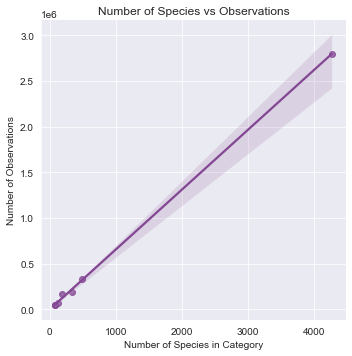

In [36]:
# Correlation Plot
sns.set_palette(palette_2)
plt.figure(figsize = (10,5))
ax = sns.lmplot(data = cat_obs_df, x = 'number_of_species', y = 'observations')
plt.title('Number of Species vs Observations')
plt.xlabel('Number of Species in Category')
plt.ylabel('Number of Observations')

corr, p = pearsonr(cat_obs_df.number_of_species, cat_obs_df.observations)
print('Pearson correlation coefficient: {correlation}'.format(correlation = corr))

In [37]:
# Approximate linear fir angular coefficient
prop_const = 2.8e6 / 4262
print(prop_const)

656.968559361802


<em> Conclusions </em>
* There is a very strong correlation between number of observations and number of different species in each category (a one to one relationship, we might say), exactly what was expected since the more biodiversity one has, the more observations are likely to be made. So the number of observations are a strong indicative for biodiversity, in this context.
* This correlation study, although arguably superfluous, was considered important to the author since confirms that the number of observations is tied to the biodiversity (number of species) among categories, so that no category is significantly over or underpopulated in the parks (this behavior would show up if the points representing the categories were far away from the fit line);
* The constant of proportionality between number of observations and number of species within a category is approximately 657 (which can be thought the average number of observations per species, averaged for the different categories).

***

### Revisiting the Correlation between Number of Observations and Concern Index

Now we try a different approach, plotting the average number of observations for each individual concern index, for each category, but dividing by the average number of observations within a category.

   concern_index  observations
0            0.0      1.068793
1            1.0      0.895735
2            3.0      0.494320
3            4.0      0.252419
Pearson correlation coefficient: -0.9985492564457213
   concern_index  observations
0            0.0      1.220322
1            1.0      0.999014
2            2.0      0.681263
3            4.0      0.210692
Pearson correlation coefficient: -0.9982430160074347
   concern_index  observations
0            0.0      1.049950
1            1.0      0.904051
2            1.5      2.788028
3            3.0      0.475531
4            4.0      0.260056
Pearson correlation coefficient: -0.4476994771417036
   concern_index  observations
0       0.000000      1.371285
1       1.000000      1.514513
2       3.000000      0.311820
3       3.333333      2.314370
4       4.000000      0.161412
Pearson correlation coefficient: -0.3381429002612849
   concern_index  observations
0            0.0      1.000840
1            1.0      0.944926
Pearson corre

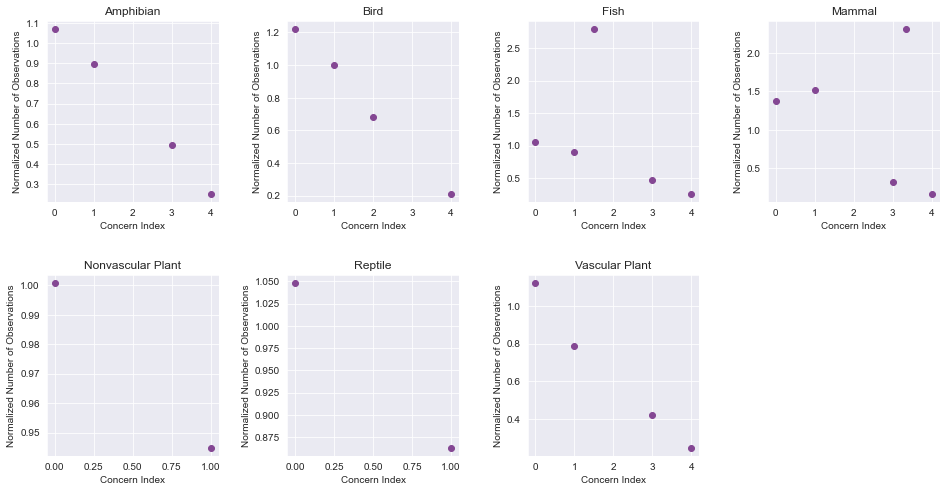

In [38]:
# Looking at the average number of observations (normalized by the average number of observations of the species category) for each concern index and category)
plt.figure(figsize = (16,8))
categories = cat_obs_df.category.tolist()
avgs = cat_obs_df.avg_obs.tolist()
df_list = []
for i in range(len(categories)):
    obs_index_avg_df = obs_index_cat_df[obs_index_cat_df.category == categories[i]].groupby('concern_index').observations.mean().reset_index()
    obs_index_avg_df.observations = obs_index_avg_df.observations / (avgs[i])
    df_list.append(obs_index_avg_df)
    print(obs_index_avg_df)
    plt.subplot(2,4, i + 1)
    plt.scatter(obs_index_avg_df.concern_index, obs_index_avg_df.observations)
    plt.title(categories[i])
    plt.xlabel('Concern Index')
    plt.ylabel('Normalized Number of Observations')
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    corr, p = pearsonr(obs_index_avg_df.concern_index, obs_index_avg_df.observations)
    print('Pearson correlation coefficient: {correlation}'.format(correlation = corr))

<em> Conclusions </em>
* When we plot the sum of observations (divided by the number of species) for each concern index, for each category separately, we start to see a pattern with stronger correlation, as can be seen by the pearson coefficients calculated.
* Maybe these plots could be used by a predictive model which, when fed with the number of observations of a species and its category, would output the expected concern index
* There are some outlier points (identificated as the ones representing the outlier species, 'Canis lupus' and 'Oncorhynchus mykiss'), which have to be removed for better fit

In [39]:
# Dropping the outliers ('Oncorhynchus mykiss')
df_list[2] = df_list[2].drop(df_list[2].index[2])
print(df_list[2])

   concern_index  observations
0            0.0      1.049950
1            1.0      0.904051
3            3.0      0.475531
4            4.0      0.260056


In [40]:
# Dropping the outliers ('Canis lupus')
df_list[3] = df_list[3].drop(df_list[3].index[3])
print(df_list[3])

   concern_index  observations
0            0.0      1.371285
1            1.0      1.514513
2            3.0      0.311820
4            4.0      0.161412


Amphibian's Pearson correlation coefficient: -0.9985492564457213
Bird's Pearson correlation coefficient: -0.9982430160074347
Fish's Pearson correlation coefficient: -0.9979471124616371
Mammal's Pearson correlation coefficient: -0.9426636684689771
Nonvascular Plant's Pearson correlation coefficient: -1.0
Reptile's Pearson correlation coefficient: -1.0
Vascular Plant's Pearson correlation coefficient: -0.9901149061151016


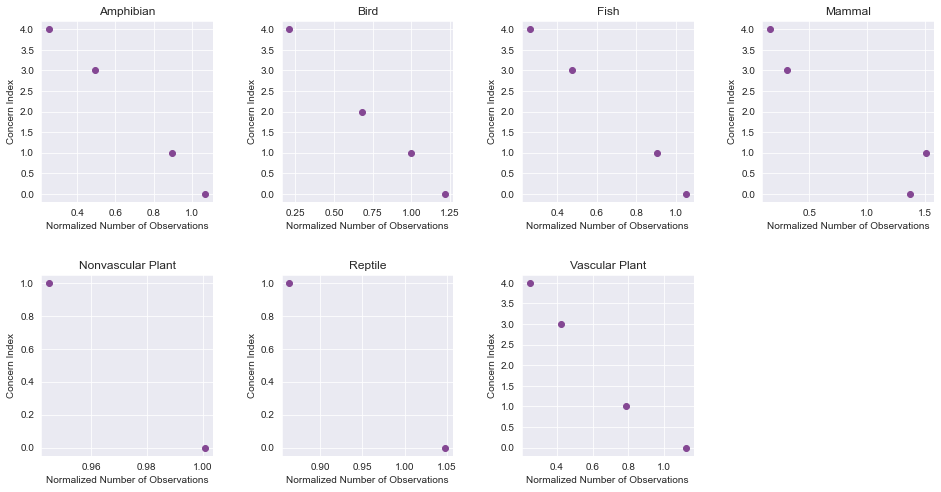

In [41]:
plt.figure(figsize = (16,8))
for i in range(len(df_list)):
    plt.subplot(2,4,i + 1)
    plt.scatter(df_list[i].observations, df_list[i].concern_index)
    plt.title(categories[i])
    plt.xlabel('Normalized Number of Observations')
    plt.ylabel('Concern Index')
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    corr, p = pearsonr(df_list[i].observations, df_list[i].concern_index)
    print("{cat}'s Pearson correlation coefficient: {correlation}".format(cat = categories[i], correlation = corr))


<em> Conclusions </em>
* Now we have plots (average number of observations, normalized, by concer_index, for each category) with very strong correlation
* Maybe they can be used to predict concern index based on number of observations of a test species within a category

***

## Conclusions

After analyzing data, some conclusions were made:

1) The study have shown a relatively small proportion of species which present conservation concern statuses, when taking into account the overall population and all species together (absolute terms);

2) When viewed by the relative point of view, however, the picture is somehow different: mammals and birds have a relatively large share of their species (17.8% and 15.2% respectively) in concern conditions. Other categories, such as amphibians, reptiles and fish, present intermediate proportions of their species in concern conditions (6-8%). Both plant categories have contribute to the vast majority of the species in the study, but proportionaly present the smaller proportions of species in concern conditions;

3) With the intention of detecting categories which present the most vulnerability, an index was created, called <em>'concern index'</em>, which averages the contribution of the different concern statuses of the species of a particular category (concern status is a categorical variable, but can be transformed into an ordinal variable because there is an implicit order of threat in its classification);

4) The comparison between the concern indexes of the different kinds of categories have outlined categories which were not on the spot before: amphibian and fish. These categories have intermediate shares of concerned species, but when taking into account the severity of the concern statuses (concern indexes), they stand out. This can be explained by a relatively large share of their concerned species presenting threatened or endangered statuses. Both of these categories, together with Mammals, all present concern indexes above the average of the categories takes together. Fish and Amphibian categories have relatively small number of species as well, which is a fact embedded in the calculation of the concern index (which is an average of the concern indexes of all species within a category), so they are a real concern to the preservation of biodiversity. Despite having lower concern indexes than Fish and Amphibians, Mammals do present concern as well do to their large population and large share of concerned species;

5) The study then focused on the correlation between number of observations and concern index. It may seem obvious that these two variables should be inversely proportional, but nevertheless an analysis was carried out and have shown that indeed they form a strong correlation pair (with negative correlation as expected) when the sum of observations within a level of concern index is taken as one of the variables;

6) Last, with the intent of providing clarification for using this data to build a predictive model of conservation statuses of the species, an analysis was conducted to confirm that the number of observations is directly proportional to the number of different species contained within a single category (biodiversity of a single category). Although it may seem obvious, such assumption could be wrong if, for instance, a large number of observations was due not only to a larger biodiversity but could be a reflex of overpopulation of one or some species within the category. The analysis have shown that its not the case, and indeed a 'one to one' relationship exists between number of observations and number of species within a category,as can be deduced by the linear fit and pearson coefficient of the corresponding plot;

## For Future Work

As a future work, it would be interesting to come up with a predictive model which can point, based on the number of observations and the category of the species, how much vulnerable (taking as the scale a concern index) a certain species is.

Maybe one way to achieve this is as follows:
* 1) Count the number of observation for a test species (say, a fish with 200 observations);
* 2) Divide the previous number by the average number of observations within the category (200 / 583 = 0,343)
* 3) Plot the previous result in the x-axis of the fish plot, which would give a <em>concern index</em> between 3,0 and 3,5